<a href="https://colab.research.google.com/github/oliver6899/AQM/blob/main/Lecture_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/AQM-2025/refs/heads/main/InvestmentsSavings.csv')

In [ ]:
data.head()

,country,investment_2004,investment_2008,investment_2012,saving_2004,saving_2008,saving_2012
0,Angola,9.2,16.2,14.9,12.6,24.8,26.9
1,Albania,37.2,33.9,26.5,32.3,20.1,18.1
2,Argentina,15.9,19.0,15.9,19.2,21.1,16.2
3,Armenia,23.9,39.8,23.6,24.0,27.9,15.4
4,Australia,26.6,28.7,28.0,21.5,22.4,25.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          164 non-null    object 
 1   investment_2004  164 non-null    float64
 2   investment_2008  164 non-null    float64
 3   investment_2012  164 non-null    float64
 4   saving_2004      164 non-null    float64
 5   saving_2008      164 non-null    float64
 6   saving_2012      164 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.1+ KB


In [ ]:
# Extract the two relevant variables (investment_2004 and saving_2004)
invest_04 = data['investment_2004']
save_04 = data['saving_2004']

In [ ]:
save_04

,saving_2004
0,12.6
1,32.3
2,19.2
3,24.0
4,21.5
...,...
159,35.5
160,35.6
161,14.6
162,25.1


In [ ]:
# Add a constant for the intercept
X = sm.add_constant(save_04)

In [ ]:
# Run OLS regression where investment is the dependent variable and savings is the independent variable
model = sm.OLS(invest_04, X).fit()

# Print out the coefficients (intercept and correlation coefficient)
print(model.params)

const          15.710438
saving_2004     0.282121
dtype: float64


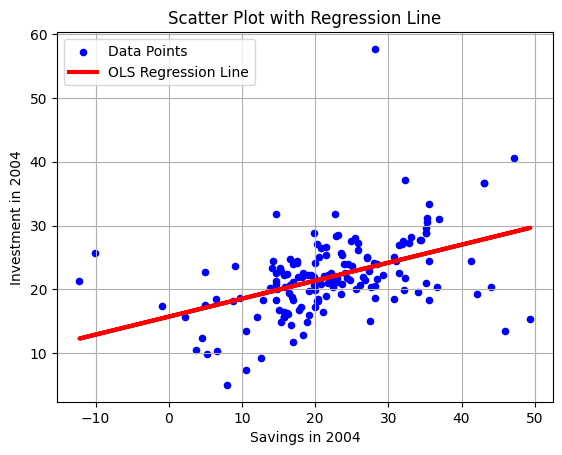

In [ ]:
# Get the predicted values (fitted line)
predictions = model.predict(X)

# Plot the data points
plt.scatter(save_04, invest_04, color='blue', s=20, label='Data Points')  # s=20 for marker size

# Plot the regression line
plt.plot(save_04, predictions, color='red', linewidth=3, label='OLS Regression Line')

# Adding labels, grid and legend
plt.xlabel('Savings in 2004')
plt.ylabel('Investment in 2004')
plt.title('Scatter Plot with Regression Line')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Extract the relevant variables for 2008
invest_08 = data['investment_2008']
save_08 = data['saving_2008']

In [ ]:
# Add a constant to the independent variable for 2008
X_08 = sm.add_constant(save_08)

In [ ]:
# Fit the OLS regression model for 2008
model_08 = sm.OLS(invest_08, X_08).fit()

In [ ]:
# Get the predicted values (fitted line for 2008)
predictions_08 = model_08.predict(X_08)

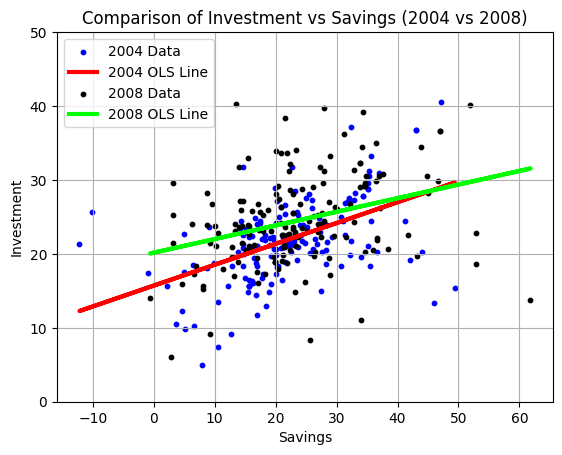

In [ ]:
# Plot the data points and regression line for 2004
plt.scatter(save_04, invest_04, color='blue', s=10, label='2004 Data')
plt.plot(save_04, predictions, color='red', linewidth=3, label='2004 OLS Line')

# Overlay the data points and regression line for 2008
plt.scatter(save_08, invest_08, color='black', s=10, label='2008 Data')
plt.plot(save_08, predictions_08, color='lime', linewidth=3, label='2008 OLS Line')

# Set y-axis limits like in R (ylim=c(0,50))
plt.ylim(0, 50)

# Adding labels and title
plt.xlabel('Savings')
plt.ylabel('Investment')
plt.title('Comparison of Investment vs Savings (2004 vs 2008)')

# Adding grid
plt.grid(True)

# Show legend
plt.legend()

# Display the plot
plt.show()

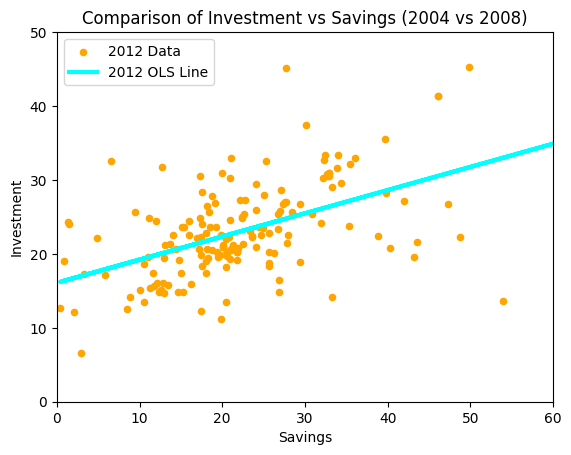

In [ ]:
# Extract the relevant variables for 2012
invest_12 = data['investment_2012']
save_12 = data['saving_2012']

# Add a constant to the independent variable for 2012
X_12 = sm.add_constant(save_12)

# Fit the OLS regression model for 2012
model_12 = sm.OLS(invest_12, X_12).fit()

# Get the predicted values (fitted line for 2012)
predictions_12 = model_12.predict(X_12)

# Overlay the data points and regression line for 2012
plt.scatter(save_12, invest_12, color='orange', s=20, label='2012 Data')
plt.plot(save_12, predictions_12, color='cyan', linewidth=3, label='2012 OLS Line')

# Set axis limits like in the previous plots
plt.xlim(0, 60)
plt.ylim(0, 50)

# Adding labels and title
plt.xlabel('Savings')
plt.ylabel('Investment')
plt.title('Comparison of Investment vs Savings (2004 vs 2008)')

# Update the legend
plt.legend()

# Display the updated plot
plt.show()


In [ ]:
# Print the summary, which includes hypothesis testing results
print(model_12.summary())

                            OLS Regression Results                            
Dep. Variable:        investment_2012   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     59.98
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           9.84e-13
Time:                        10:34:10   Log-Likelihood:                -511.86
No. Observations:                 164   AIC:                             1028.
Df Residuals:                     162   BIC:                             1034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.0844      1.002     16.056      

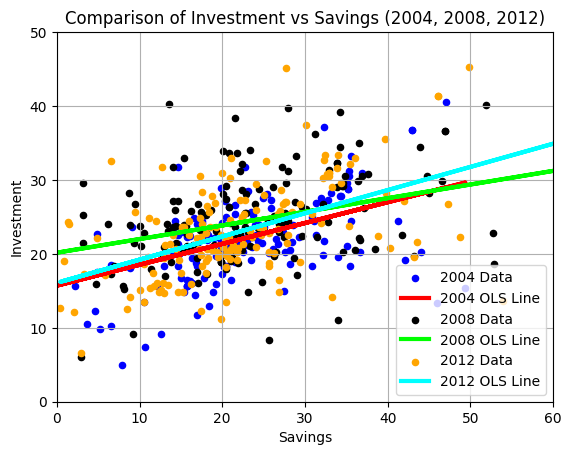

In [ ]:
# Plot the data points and regression line for 2004, 2008 and 2012
plt.scatter(save_04, invest_04, color='blue', s=20, label='2004 Data')
plt.plot(save_04, predictions, color='red', linewidth=3, label='2004 OLS Line')
plt.scatter(save_08, invest_08, color='black', s=20, label='2008 Data')
plt.plot(save_08, predictions_08, color='lime', linewidth=3, label='2008 OLS Line')
plt.scatter(save_12, invest_12, color='orange', s=20, label='2012 Data')
plt.plot(save_12, predictions_12, color='cyan', linewidth=3, label='2012 OLS Line')

# Set axis limits like in the previous plots
plt.xlim(0, 60)
plt.ylim(0, 50)

# Adding labels and title
plt.xlabel('Savings')
plt.ylabel('Investment')
plt.title('Comparison of Investment vs Savings (2004, 2008, 2012)')

# Adding grid
plt.grid(True)

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Get the coefficients for each model
coefficients_04 = model.params
coefficients_08 = model_08.params
coefficients_12 = model_12.params

print("Coefficients for 2004:")
print(coefficients_04)

print("\nCoefficients for 2008:")
print(coefficients_08)

print("\nCoefficients for 2012:")
print(coefficients_12)

Coefficients for 2004:
const          15.710438
saving_2004     0.282121
dtype: float64

Coefficients for 2008:
const          20.162985
saving_2008     0.184324
dtype: float64

Coefficients for 2012:
const          16.084433
saving_2012     0.313504
dtype: float64


In [ ]:
# Print the summary, which includes hypothesis testing results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        investment_2004   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     42.43
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           8.82e-10
Time:                        10:26:04   Log-Likelihood:                -512.17
No. Observations:                 164   AIC:                             1028.
Df Residuals:                     162   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.7104      1.050     14.959      